# U.S. Medical Insurance Costs

This project's purpose is to analyze data about medical insurance costs from a CSV file using Python fundamentals. Given insurance.csv, some attributes were studied to find potential features of the patients information in the file and reported as results.

In [229]:
#import libraries
import csv
import numpy as np
from decimal import Decimal
from matplotlib import pyplot as plt

In [1]:
#initial 
ages = []
sexes = []
bmis = []
childrens = []
smokers = [] 
regions = []
charges = []

In [5]:
#load data
def load_data(column, fileName):
    columns_data = []
    with open(fileName) as file:
        data = csv.DictReader(file)
        for row in data:
            columns_data.append(row[column])
    return columns_data

In [198]:
#assign each column data to variables
ages = load_data("age", "insurance.csv")
sexes = load_data("sex", "insurance.csv")
bmis = load_data("bmi", "insurance.csv")
childrens = load_data("children", "insurance.csv")
smokers = load_data("smoker", "insurance.csv")
regions = load_data("region", "insurance.csv")
charges = load_data("charges", "insurance.csv")

['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest', 'northeast', 'southeast', 'southwest', 'southeast', 'southeast', 'southwest', 'northeast', 'northeast', 'southwest', 'southwest', 'northeast', 'southwest', 'southeast', 'northeast', 'northwest', 'southeast', 'northeast', 'northwest', 'northwest', 'southwest', 'southwest', 'northeast', 'southwest', 'northwest', 'southwest', 'northwest', 'northwest', 'southwest', 'northeast', 'southwest', 'northeast', 'southeast', 'southeast', 'southeast', 'northeast', 'southwest', 'northeast', 'northwest', 'southeast', 'southeast', 'northeast', 'northwest', 'southwest', 'southeast', 'northwest', 'northwest', 'northeast', 'southeast', 'southeast', 'northwest', 'northeast', 'southeast', 'northwest', 'northwest', 'northwest', 'southwest', 'southwest', 'northwest', 'southeast', 'southeast', 'southeast', 'northeast', 'southwest', 'southeast', 'southwest', 'northwest', 'southeast'

In [17]:
#Preprocess Data
#Overview
#At first look at the Data We have 7 attributes with about 1338 patiens
#The first and fourth attribute include interger value
#The third and seventh attribute include float value
#The second and fifth attribute are string value but each of its have two kind of value (yes/no with the fifth attribute and female/male with the second attribute)
#The sixth attribute is string value and have 4 kinds of value('southwest', 'southeast', 'northwest' and 'northeast')
#no missing, none value
#For more flexible I transform string value into int value
#1: Yes, Female 
#0: No, Male
#0: southwest
#1: southeast
#2: northwest
#3: northeast
#And rounding float value with 3 numbers

In [199]:
def preprocess_data(ages, sexes, bmis, childrens, smokers, regions, charges):
    tmp_ages = [int(age) for age in ages]
    tmp_sexes = [1 if sex == "female" else 0 for sex in sexes]
    tmp_bmis = [round(Decimal(bmi), 3) for bmi in bmis]
    tmp_childrens = [int(children) for children in childrens]
    tmp_smokers = [1 if smoker == "yes" else 0 for smoker in smokers]
    tmp_regions = []
    for region in regions:
        if region == "southwest":
            tmp_regions.append(0)
        elif region == "southeast":
            tmp_regions.append(1)
        elif region == "northwest":
            tmp_regions.append(2)
        else:
            tmp_regions.append(3)
    tmp_charges = [round(float(charge),3) for charge in charges]
    return tmp_ages, tmp_sexes, tmp_bmis, tmp_childrens, tmp_smokers, tmp_regions, tmp_charges 

In [200]:
ages, sexes, bmis, childrens, smokers, regions, charges = preprocess_data(ages, sexes, bmis, childrens, smokers, regions, charges)

In [26]:
#After preprocessing data, let's visualize its and see few distribution of each columns

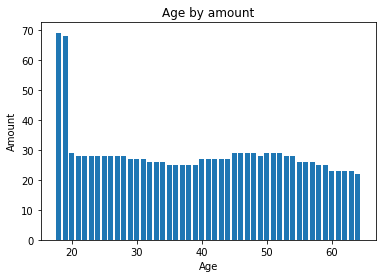

In [33]:
ages_by_amount = {}
for age in ages:
    if age not in ages_by_amount:
        ages_by_amount[age] = 1
    else:
        ages_by_amount[age] += 1
ages_by_amount = dict(sorted(ages_by_amount.items()))
age = list(ages_by_amount.keys())
amount = list(ages_by_amount.values())
fig, ax = plt.subplots()
ax.set_xlabel('Age')
ax.set_ylabel('Amount')
ax.set_title("Age by amount")
ax.bar(age, amount)
plt.show()

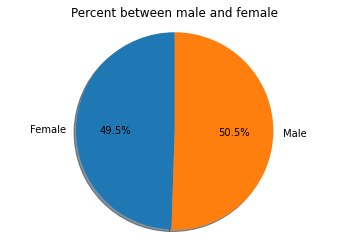

In [48]:
labels = ["Female", "Male"]
sizes = [sum(sexes)*100/len(sexes),100 - sum(sexes)*100/len(sexes)]
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title('Percent between male and female')
plt.show()

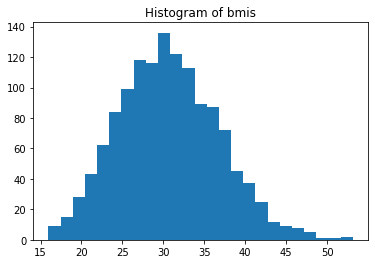

In [135]:
fig, ax = plt.subplots()
ax.hist(bmis, 25)
ax.set_title("Histogram of bmis")
plt.show()

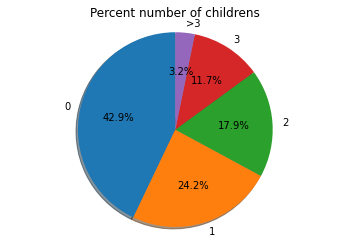

In [143]:
labels = ["0", "1", "2", "3", "4", "5"]
sizes = [childrens.count(int(item))*100/len(childrens) for item in labels]
labels[4] = ">3"
sizes[4] = sizes[4] + sizes[5]
fig, ax = plt.subplots()
ax.pie(sizes[:5], labels = labels[:5], autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title('Percent number of childrens')
plt.show()

[20.47832585949178, 79.52167414050822]


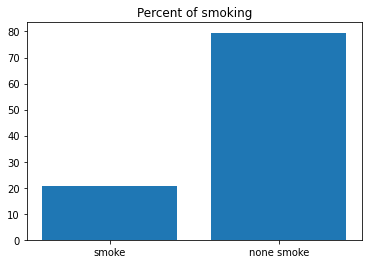

In [162]:
labels = ["smoke", "none smoke"]
sizes = [sum(smokers)*100/len(smokers),100 - sum(smokers)*100/len(smokers)]
fig, ax = plt.subplots()
ax.bar(labels, sizes)
ax.set_title('Percent of smoking')
plt.show()

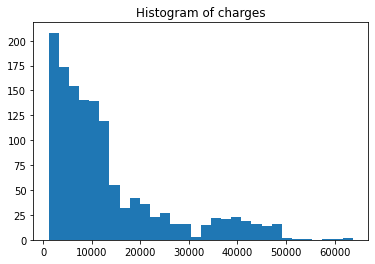

In [163]:
fig, ax = plt.subplots()
ax.hist(charges, 30)
ax.set_title("Histogram of charges")
plt.show()

In [154]:
average_ages = sum(ages) / len(ages)
min_ages = min(ages)
max_ages = max(ages)
average_bmis = sum(bmis) / len(bmis)
min_bmis = min(bmis)
max_bmis = max(bmis)
average_childrens = sum(childrens) / len(childrens)
min_childrens = min(childrens)
max_childrens = max(childrens)
average_charges = sum(charges) / len(charges)

In [158]:
print("The average age is {average_ages}, the age range from {min_ages} to {max_ages}.".format(average_ages = round(average_ages), min_ages = min_ages, max_ages = max_ages))
print("The average bmi is {average_bmis}, the bmi range from {min_bmis} to {max_bmis}.".format(average_bmis = round(average_bmis), min_bmis = min_bmis, max_bmis = max_bmis))
print("The average children is {average_childrens}, the childrens range from {min_childrens} to {max_childrens}.".format(average_childrens = round(average_childrens), min_childrens = min_childrens, max_childrens = max_childrens))
print("The average charge is {average_charges}".format(average_charges = round(average_charges,2)))

The average age is 39, the age range from 18 to 64.
The average bmi is 31, the bmi range from 15.960 to 53.130.
The average children is 1, the childrens range from 0 to 5.
The average charge is 13270.41


In addition in this data take a look into graph

1, Most of amount of ages is less than 20, the otherwise have similar distribution

2, The ratio between Male and Female are quite balance

3, About the number of children: most of its have no child (42,9 %), next we have 24,2% for 
a child, 17,9% for 2 children and approximate 15% for 3 and more children

4, non-smoker have amount 4 times bigger than smoker

5, We can divide charges into 2 groups: less than 13000$ and over 13000$

Next, i will calculate charges by sex - region

In [248]:
#charges by sex - region
labels =["southwest", "southeast", "northwest", "northeast"]
charges_by_sex_region = list(zip(sexes,regions, charges))
region_codes = [0, 1, 2, 3]
charges_by_region = []
for region in region_codes:
    charge_by_male = 0
    charge_by_female = 0
    for item in charges_by_sex_region:
        if item[1] == region:
            if(item[0] == 1):
                charge_by_female += item[2]
            else:
                charge_by_male += item[2]
    print("The difference between female and male in {regions} is {diff}%.".format(regions = labels[region], diff = round((charge_by_female - charge_by_male)*100/(charge_by_female + charge_by_male),3)))
    charges_by_region.append([charge_by_female, charge_by_male])


The difference between female and male in southwest is -8.968%.
The difference between female and male in southeast is -11.91%.
The difference between female and male in northwest is 1.429%.
The difference between female and male in northeast is -3.977%.


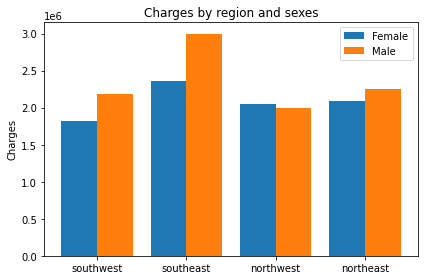

In [249]:
labels =["southwest", "southeast", "northwest", "northeast"]
width = 0.4
x = np.arange(len(labels ))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [item[0] for item in charges_by_region], width, label = 'Female')
rects2 = ax.bar(x + width/2, [item[1] for item in charges_by_region], width, label = 'Male')
ax.set_ylabel('Charges')
ax.set_title('Charges by region and sexes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

As the result, we can see that in southeast region, people must charges highest, more over male in this region must paid higher nearly 12% than female. 

In additional, southwest we see the same big of difference like southeast, it's about 9%. 

So, We can conclusion that male in southwest and southeast will be paid more than female.

And if you live in the south, you will paid more than the other regions